In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load data

In [2]:
df=pd.read_csv('test_appdata.csv')

In [3]:
df.head()

,timeElapsed,x,y,z,label
0,0,0.75,-9.53,1.04,Standing
1,1,0.76,-9.55,1.05,Standing
2,2,0.77,-9.53,1.05,Standing
3,3,0.80,-9.53,1.01,Standing
4,4,0.87,-9.55,1.03,Standing


In [4]:
df.isnull().sum()

timeElapsed    0
x              0
y              0
z              0
label          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(341924, 5)

In [7]:
df['label'].unique()

array(['Standing', 'Sitting', 'Walking', 'Upstairs', 'Downstairs'],
      dtype=object)

In [8]:
df['label'].value_counts()

Walking       100033
Sitting        91000
Upstairs       66095
Downstairs     42443
Standing       42353
Name: label, dtype: int64

## Plot Axies of Accelerometer Dataset 

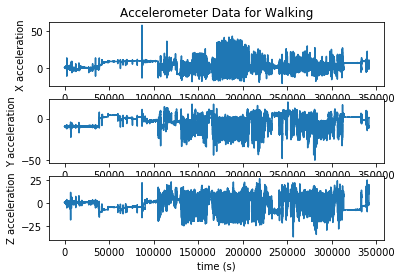

<Figure size 720x720 with 0 Axes>

In [9]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [10]:
X_acc=df['x'].values
Y_acc=df['y'].values
Z_acc=df['z'].values


In [11]:
def Filter (Data):
        a=0.05  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [12]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

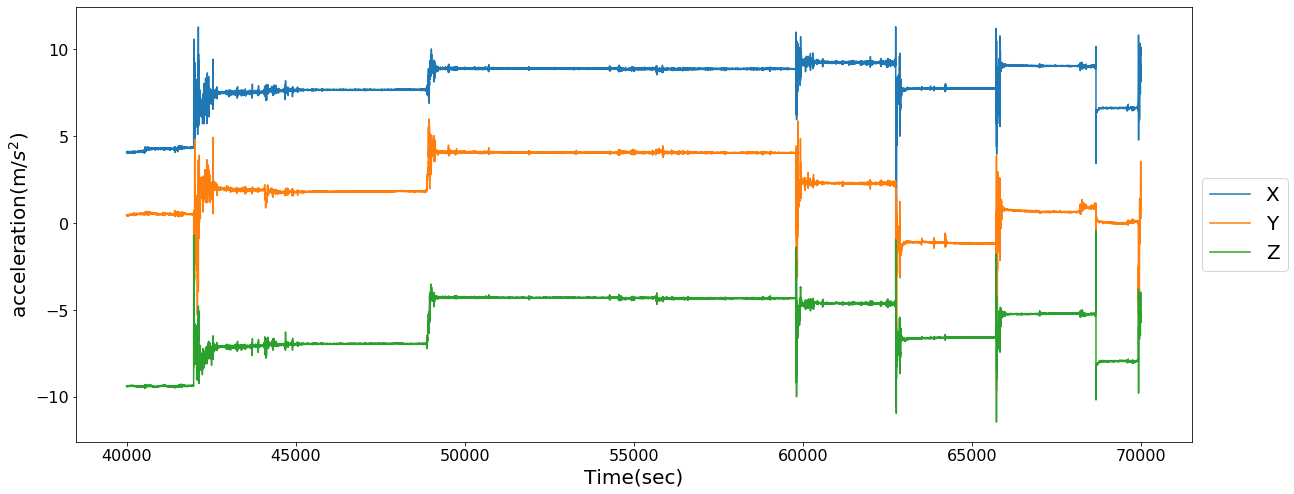

In [13]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'].iloc[40000:70000],df['x'].iloc[40000:70000],label='X')
plt.plot(df['timeElapsed'].iloc[40000:70000],df['y'].iloc[40000:70000],label='Y')
plt.plot(df['timeElapsed'].iloc[40000:70000],df['z'].iloc[40000:70000],label='Z')
# plt.title('X Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('acceleration(m/$s^{2}$)',fontsize=20)
plt.xlabel('Time(sec)',fontsize=20)
plt.xticks(fontsize=16,color='black')
plt.yticks(fontsize=16,color='black')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.savefig('acc.png')
plt.show()


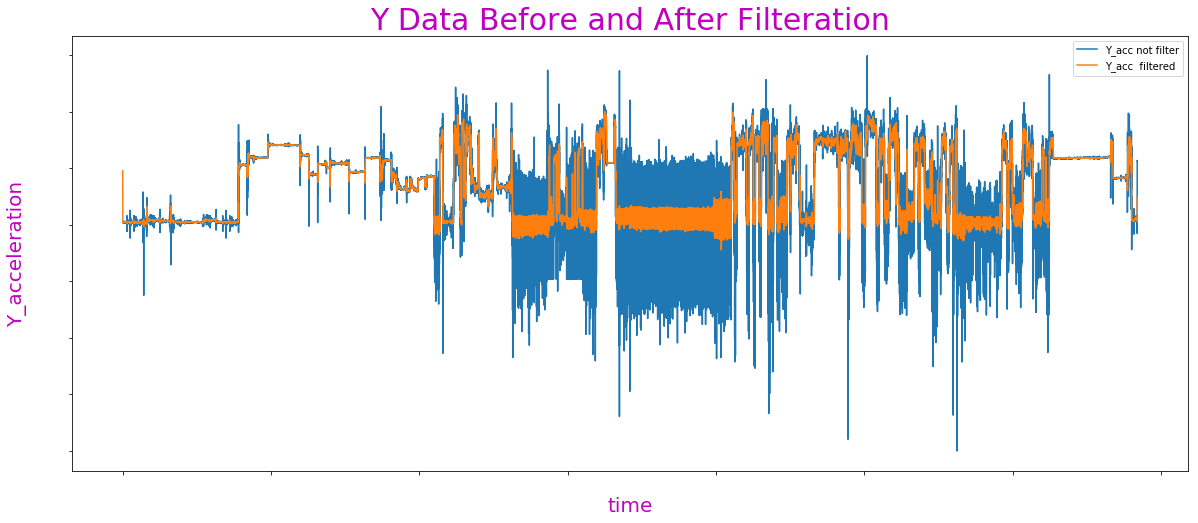

In [14]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('Y_acceleration',color='m',fontsize=20)
plt.xlabel('time',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()

plt.show()

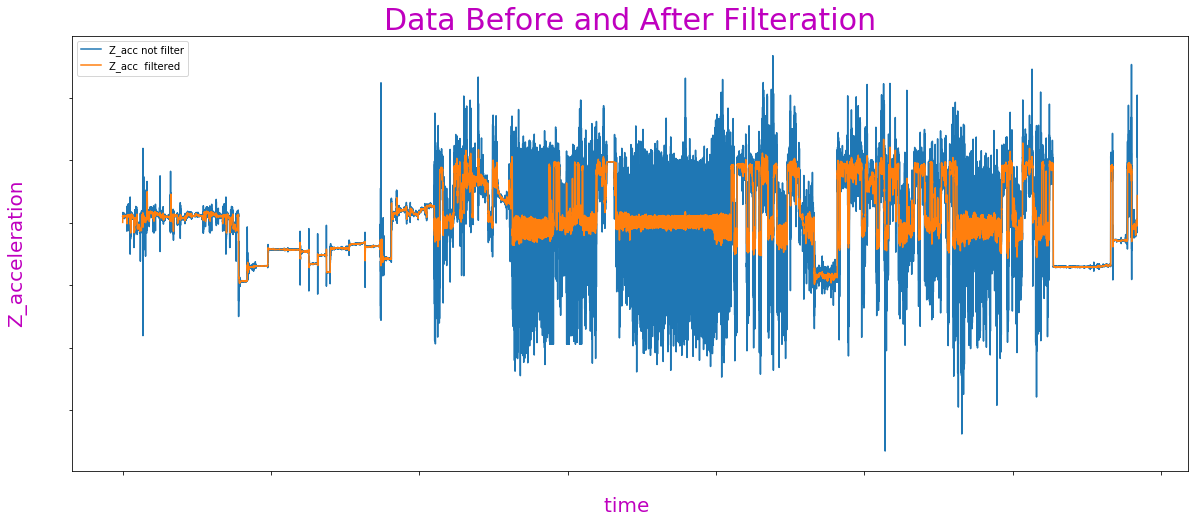

In [15]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('Z_acceleration',color='m',fontsize=20)
plt.xlabel('time ',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [16]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 7)
Y_smoothed = gaussian_filter1d(Y_filtered, 7)
Z_smoothed = gaussian_filter1d(Z_filtered, 7)


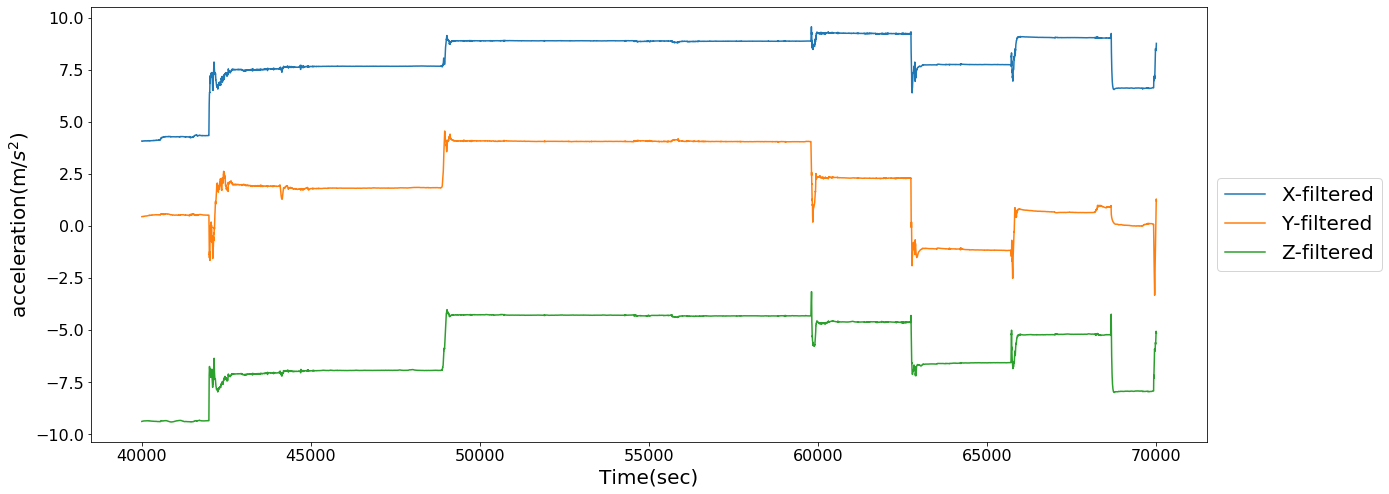

In [17]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'].iloc[40000:70000],X_filtered[40000:70000],label='X-filtered')
plt.plot(df['timeElapsed'].iloc[40000:70000],Y_filtered[40000:70000],label='Y-filtered')
plt.plot(df['timeElapsed'].iloc[40000:70000],Z_filtered[40000:70000],label='Z-filtered')
plt.ylabel('acceleration(m/$s^{2}$)',fontsize=20)
plt.xlabel('Time(sec)',fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('filter.png')
plt.show()

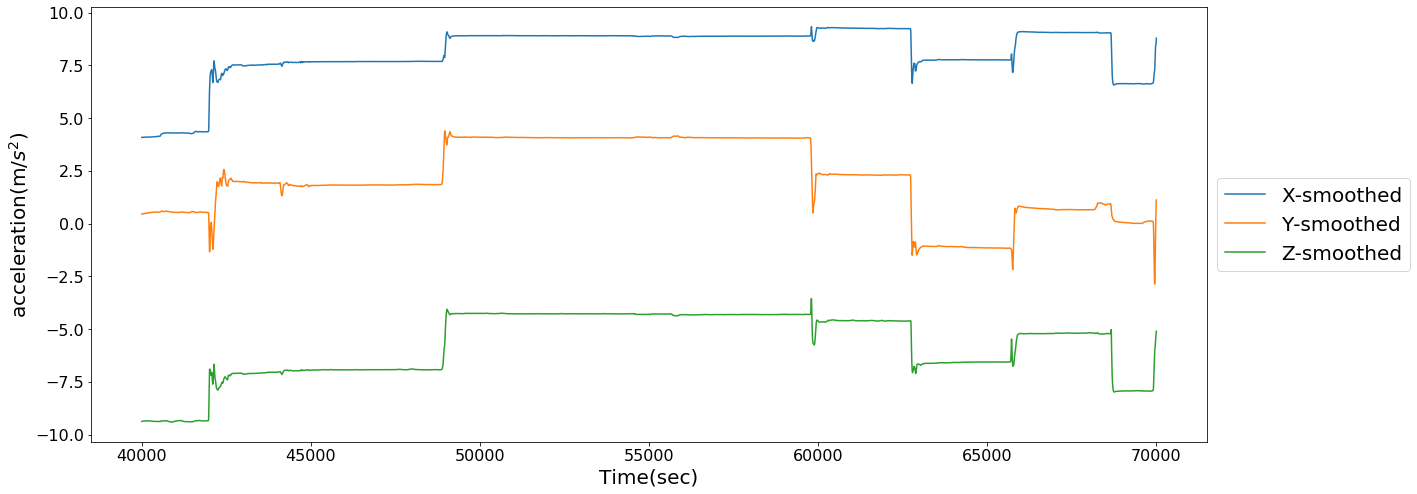

In [18]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'].iloc[40000:70000],X_smoothed[40000:70000],label='X-smoothed')
plt.plot(df['timeElapsed'].iloc[40000:70000],Y_smoothed[40000:70000],label='Y-smoothed')
plt.plot(df['timeElapsed'].iloc[40000:70000],Z_smoothed[40000:70000],label='Z-smoothed')
# plt.title('Accelerometer axies smoothed signal',color='c',fontsize=30)
plt.ylabel('acceleration(m/$s^{2}$)',fontsize=20)
plt.xlabel('Time(sec)',fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('smoothed.png')
plt.show()

In [19]:
df['X_smoothed']=X_smoothed
df['Y_smoothed']=Y_smoothed
df['Z_smoothed']=Z_smoothed
df.head()

,timeElapsed,x,y,z,label,X_smoothed,Y_smoothed,Z_smoothed
0,0,0.75,-9.53,1.04,Standing,0.202521,-2.412623,0.255351
1,1,0.76,-9.55,1.05,Standing,0.205420,-2.448068,0.259042
2,2,0.77,-9.53,1.05,Standing,0.211128,-2.517962,0.266327
3,3,0.80,-9.53,1.01,Standing,0.219471,-2.620374,0.277016
4,4,0.87,-9.55,1.03,Standing,0.230201,-2.752555,0.290843


### Window Technique and Feature Extraction

In [41]:
x_list = []
y_list = []
z_list = []
train_labels = []

window_size = 20
step_size = 10

# creating overlaping windows of size window-size 100
for i in range(0, df.shape[0] - window_size, step_size):
    xs = df['X_smoothed'].values[i: i + 20]
    ys = df['Y_smoothed'].values[i: i + 20]
    zs = df['Z_smoothed'].values[i: i + 20]
    label = stats.mode(df['label'][i: i + 20])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/100))

In [42]:
X_train.head()

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness,z_skewness,x_kurtosis,y_kurtosis,z_kurtosis,x_energy,y_energy,z_energy,avg_result_accl,sma
0,0.323687,-3.949061,0.419888,0.089856,1.155336,0.125269,0.079545,1.020956,0.110516,0.202521,...,-0.204801,0.236665,-1.355148,-1.339371,-1.317227,0.022569,3.385976,0.038400,3.984494,0.938527
1,0.471198,-5.873344,0.634015,0.078889,1.046928,0.119826,0.068259,0.907140,0.103927,0.326118,...,0.280043,-0.239323,-1.140900,-1.154504,-1.182454,0.045650,7.118445,0.083267,5.926234,1.395711
2,0.581138,-7.336947,0.803768,0.049009,0.654251,0.077065,0.042307,0.564115,0.066541,0.487642,...,0.346176,-0.356462,-1.076933,-1.077709,-1.083545,0.068025,10.851766,0.130396,7.403688,1.744371
3,0.649145,-8.233155,0.905725,0.030477,0.392414,0.042268,0.026047,0.338306,0.036419,0.592742,...,0.350831,-0.482166,-1.074867,-1.073841,-0.991638,0.084464,13.587766,0.164425,8.308224,1.957605
4,0.697490,-8.768896,0.958857,0.025618,0.233492,0.020525,0.022313,0.201291,0.017373,0.654176,...,0.357933,-0.394791,-1.235468,-1.069540,-0.907235,0.097430,15.389611,0.183965,8.848701,2.085049


In [37]:
df_New=X_train


In [38]:
X=X_train
y=np.array(train_labels)

In [39]:
X.shape

(34191, 50)

In [40]:
y.shape

(34191,)

# Classification Phase


### Splitting data to train and test

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=49)

During train uncomment this cell

In [44]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (23933, 50)
X_test_shape ----> (10258, 50)
Y_train_shape ----> (23933,)
Y_test_shape ----> (10258,)


During train uncomment this cell

### Preprocessimg label data and feature

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_labeled=le.fit_transform(y_train)
y_labeled_test=le.transform(y_test)
Y_all=le.transform(y)


In [46]:
z=le.inverse_transform(np.unique(y_labeled))


In [47]:
z

array(['Downstairs', 'Sitting', 'Standing', 'Upstairs', 'Walking'],
      dtype='<U10')

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_Scaler_train=sc.fit_transform(X_train)
x_Scaler_test=sc.transform(X_test)
X_all=sc.transform(X)


### Using Support vector machine Classification

In [49]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'rbf')
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , X_all , Y_all, cv = 3)
print("Cross validation for train data SVC is : ", cv_svm_train.mean())




Cross validation for train data SVC is :  0.6137287590301542


During train uncomment this cell

Confusion matrix is :
  [[ 838    0    7  276  137]
 [   5 2721    0   18    5]
 [   5    1 1208   48   30]
 [ 323   11   71 1301  280]
 [ 134   46   79  267 2447]]


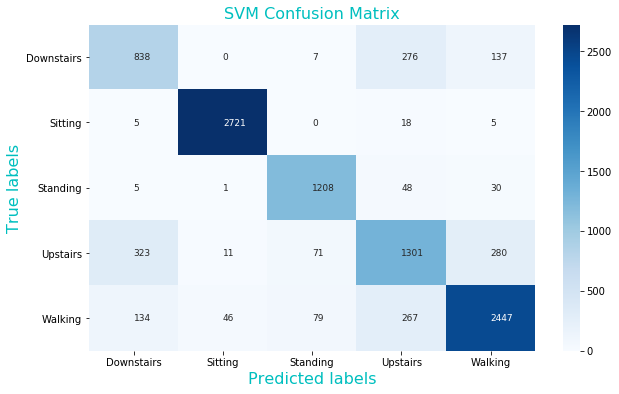

In [50]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test,y_pred_SVC)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('SVM Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10,rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);



### Showing Accuracy using accuracy_score

In [51]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC          --------->',round(accuracy_score(y_labeled_test, y_pred_SVC),2))


Accuracy of SVC          ---------> 0.83
